In [1]:
import torch as tch
import torch.distributions as dist
import matplotlib.pyplot as plt

In [2]:
MU = -4.5
SIGMA = 2.0
sample = dist.normal.Normal(MU, SIGMA).sample((1000,))

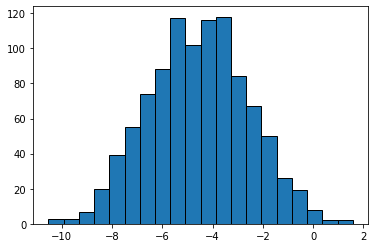

In [3]:
plt.hist(sample, bins=20, edgecolor='k');

In [4]:
mu = tch.nn.Parameter(tch.rand((1,)), requires_grad=True)
sigma = tch.nn.Parameter(tch.rand((1,)), requires_grad=True)
optim = tch.optim.Adam([mu, sigma], lr=0.01)

In [5]:
for i in range(5000):
  nll = -1.*tch.sum(dist.normal.Normal(mu, sigma).log_prob(sample))
  nll.backward()
  optim.step()
  optim.zero_grad()

  sigma.clamp(1e-16, 10.)

In [6]:
print("Mean: {}   Sigma: {}".format(mu.item(), sigma.item()))

Mean: -4.564687252044678   Sigma: 1.9725515842437744
